# Introduction

This research examines teen technology habits as reported by teens in the year 2018. The connection between age and amount of time spent on technology is first examined, followed by an analysis of teen perceptions about fitting in and social media usage and how those perceptions vary based on technology usage.

## Overarching Question: What effect does technology usage have on teen mental health?

I first became interested in this topic after recently reading “The Anxious Generation” by Johnathan Haidt. In this book, Haidt explores how the wide prevalence of the smartphone and social media has rewired childhood for kids during middle school and early high school. His main premise is that increased social media and smartphone usage has led to the massive increases in depression and anxiety we have seen since 2012, which is about the same time the smartphone became readily available. While I think this project will be similar to his work, I will not set out to look at his main premise, but rather explore some other ideas related to teen tech habits. This question also has relevance to my work as a teacher where social media is a daily part of my students’ lives. 

# Data

In [1]:
#Include any import statements you will need
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### 💻 FILL IN YOUR DATASET FILE NAME BELOW 💻 ###

file_name = "March 7-April 10, 2018 - Teens and Tech Survey - CSV.csv"
dataset_path = "data/" + file_name

df = pd.read_csv(dataset_path)

In [3]:
df.head()

CASEID SURV_LANG  FITIN  FRIEND1  FRIEND2  FRIEND3  FRIEND4_1  FRIEND4_2  \
0       2        EN    NaN        3        1        2          0          1   
1       7        EN    2.0        2        1        3          1          1   
2       9        EN    2.0        2        1        3          0          0   
3      10        EN    1.0        4        3        2          0          1   
4      13        EN    2.0        4        4        2          0          1   

   FRIEND4_3  FRIEND4_4  ...  HH25  HH612  HH1317 HH18OV   CO_DATE   DURATION  \
0          0          1  ...     1      3       2      4  20180322  22.866667   
1          1          0  ...     0      2       2      4  20180324  17.850000   
2          0          1  ...     1      2       1      2  20180323  12.316667   
3          1          0  ...     0      0       1      2  20180402   9.733333   
4          0          0  ...     0      1       2      3  20180308  14.633333   

  SURV_MODE MODE_END      DEVICE    WEIGHT  
0         1        1     Desktop  0.794092  
1         2        2  Smartphone  0.313173  
2         2        2  Smartphone  0.357175  
3         2        2  Smartphone  0.762108  
4         2        2  Smartphone  0.842675  

[5 rows x 176 columns]

**Data Overview**

This data set shows the results of a survey by the Pew Research Center given to teens in 2018. Teens were asked various questions about technology and most were answered on a scale of 0-4. The dataset also includes some general demographic information. A key supplements the data which includes the full question and responses for each question. I will refer to those questions and responses in the methods and results below.

# Methods and Results

First, the data relevant to this study will be extracted into a new data set.



In [4]:
new_df=df[['AGE','INTREQ','FITIN','SOC1']]
new_df.head()

AGE  INTREQ  FITIN  SOC1
0   14       5    NaN   3.0
1   15       1    2.0   2.0
2   13       2    2.0   3.0
3   17       1    1.0   2.0
4   15       2    2.0   2.0

## First Research Question: How does the amount of time teens spend on technology vary by age?


### Methods

Teens in this survery were grouped into 5 age categories ranging incluisviely from age 13 to age 17. The number of participants in each category was roughly equal as indicated in the percentage of respondents by age in the table below.

In [5]:
new_df.AGE.value_counts(normalize=True)

13    0.220727
15    0.211306
16    0.192463
17    0.191117
14    0.184388
Name: AGE, dtype: float64

This question is answered by generating a plot showing the number of teens that responded for each level of self reported technology usage. Responses were further broken down by age to determine if their was any trend or pattern in technology usage by age. 

The question teens were asked in the survey was "How frequently do you use technology?" and their responses were given a numeric score of 1-5 based on:
1- Almost constantly
2- Several Times a Day
3- About Once a Day
4- Several times a week
5- Less often

These numeric scores were translated back into the category titles on the plot in order to more clearly present the data.

In addition, a second plot was also constructed which focused on the more frequent responses (almost constantly and several times a day). This plot shows only the number of teens who responded to these 2 questions further sorted by age. This provides an additional way to look at the most frequent responses in the data.

### Results 

In [6]:
import seaborn as sns
sns.set_theme()


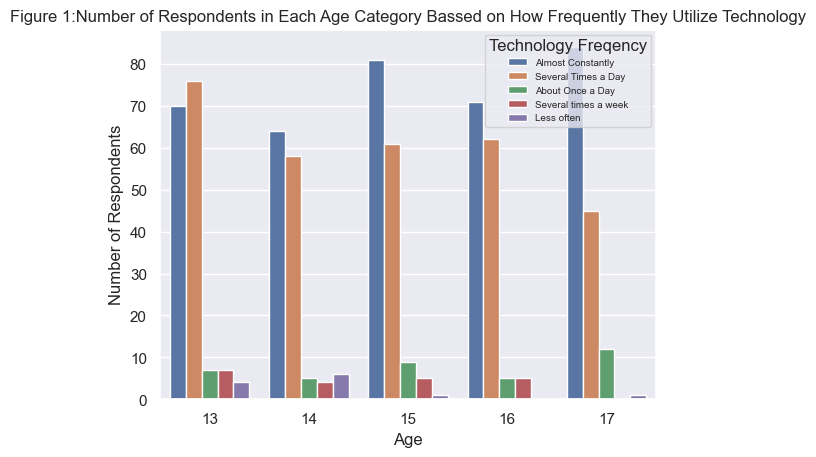

In [28]:
sns.countplot(data=new_df, x="AGE", hue="INTREQ")
plt.title('Figure 1:Number of Respondents in Each Age Category Bassed on How Frequently They Utilize Technology')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ["Almost Constantly", "Several Times a Day", "About Once a Day", "Several times a week", "Less often"]
plt.legend(handles, new_labels, title="Technology Freqency", loc='upper right', prop={'size': 7})
plt.show()

In [33]:
bins = [0, 1, 2]
labels = ["Almost Constantly", "Several Times Per Day"]
new_df["Tech Frequency"] = pd.cut(new_df.INTREQ, bins=bins,labels=labels)

/var/folders/c3/lngy07lx6hx3_kdztwrlr7j80000gn/T/ipykernel_13654/3589548713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Tech Frequency"] = pd.cut(new_df.INTREQ, bins=bins,labels=labels)


Text(0, 0.5, 'Number of Respondents')

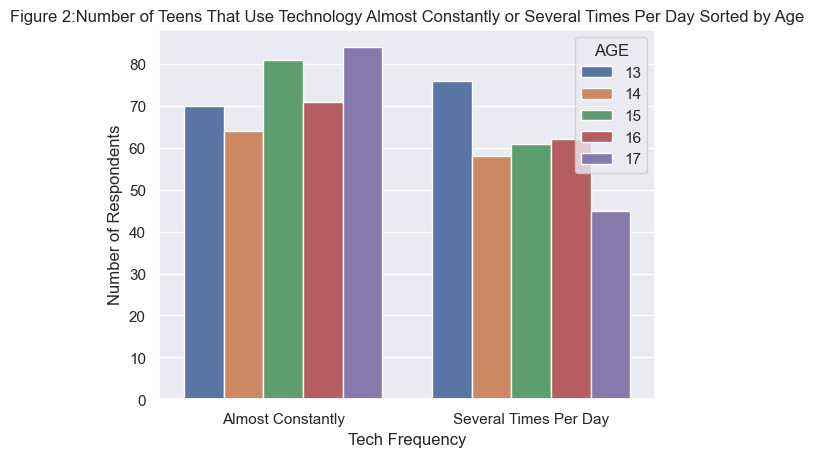

In [35]:
sns.countplot(data=new_df, x="Tech Frequency", hue="AGE")
plt.title('Figure 2:Number of Teens That Use Technology Almost Constantly or Several Times Per Day Sorted by Age')
plt.ylabel('Number of Respondents')

## Second Research Question: How does frequency of using technology correspond with how well a teen perceives he or she fits in? How does frequency of using technology correspond with how much a teen thinks social media has an effect on people their age?


### Methods

This question will continue to look at the responses sorted by age, but this time will focus on the responses to 2 questions.

The first, "In general, which of the following statements comes closest to describing how you see yourself compared with other people your age where you live?" where the choices were 1-I tend to fit in pretty easily or 2-I tend to stand out.

And the second, "Overall, what effect would you say social media has had on people your age?", where the choices were 1-mostly positive, 2- mostly negative, or 3- neither positive or negative.

The data in this section will also be reported using 2 plots. Both plots show the number of respondents vs. how frequently they use technology, with each plot having multiple bars for each technology category. In plot 1, the multiple bars indicate how well a teen reports fitting in (Fit In Easily or Tend to Stand Out), and in plot 2, the bars indicate the effect teens self-report of social media having on others their age (Positive, Negative, or Neither).


### Results 

In [45]:
bins = [0, 1, 2,3,4,5]
labels = ["Almost Constantly", "Several Times Per Day", "About Once a Day", "Several Times Per Week", "Less Often"]
new_df["Technology Usage"] = pd.cut(new_df.INTREQ, bins=bins,labels=labels)

/var/folders/c3/lngy07lx6hx3_kdztwrlr7j80000gn/T/ipykernel_13654/1502103936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Technology Usage"] = pd.cut(new_df.INTREQ, bins=bins,labels=labels)


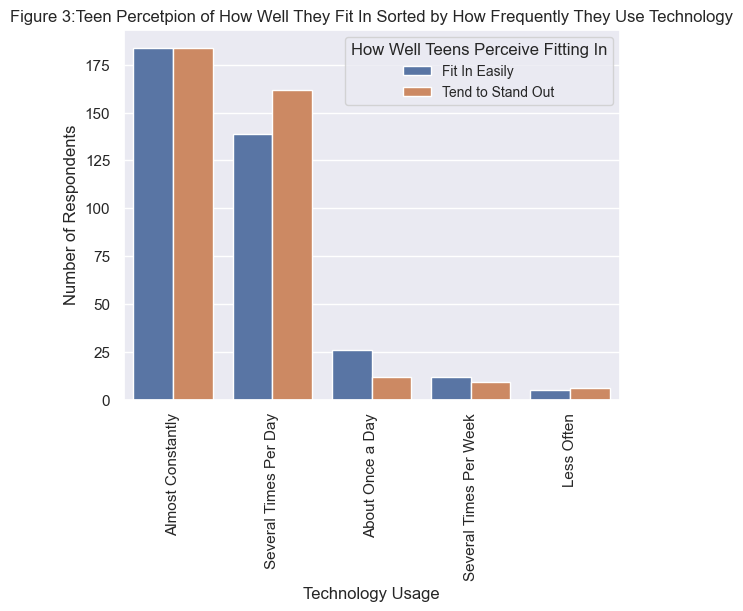

In [50]:
sns.countplot(data=new_df, x="Technology Usage", hue="FITIN")
plt.title('Figure 3:Teen Percetpion of How Well They Fit In Sorted by How Frequently They Use Technology')
plt.ylabel('Number of Respondents')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ["Fit In Easily", "Tend to Stand Out"]
plt.legend(handles, new_labels, title="How Well Teens Perceive Fitting In", loc='upper right', prop={'size': 10})
plt.xticks(rotation = 90)
plt.show()


In [ ]:
bins = [0, 1, 2,3,4,5]
labels = ["Almost Constantly", "Several Times Per Day", "About Once a Day", "Several Times Per Week", "Less Often"]
new_df["Technology Usage"] = pd.cut(new_df.INTREQ, bins=bins,labels=labels)

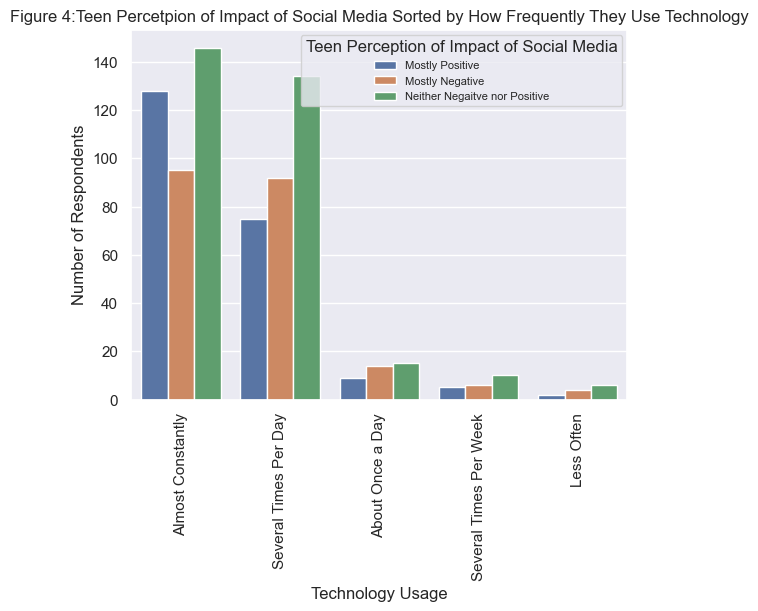

In [54]:
sns.countplot(data=new_df, x="Technology Usage", hue="SOC1")
plt.title('Figure 4:Teen Percetpion of Impact of Social Media Sorted by How Frequently They Use Technology')
plt.ylabel('Number of Respondents')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ["Mostly Positive", "Mostly Negative", "Neither Negaitve nor Positive"]
plt.legend(handles, new_labels, title="Teen Perception of Impact of Social Media", loc='upper right', prop={'size': 8})
plt.xticks(rotation = 90)
plt.show()

# Discussion

## Considerations

The results provide some information to help establish a relationship between technology use and teen mental health. However, there were several major limitations in the data set that leads to more research and analysis needing to be conducted.

The first limitation was that teen technology usage was only characterized as frequency per day and not hours per day. For technology usage, most teens fell in the "almost constantly" or "several times per day" category, within which there could still be a lot of variation in technology usage. I had hoped in this research to establish a greater trend between hours of tech use and response to the fiting in and social media usage questions, however the way the data was collected (amount per day rather than hours) made it impossible to establish such a trend.

The second limitation was that the responses to the "FITIN" and "SOC1" questions only had 2 or 3 responses. It would have been easier to establish a trend or pattern had these responses been on a Likert-type (1-10) scale.

Overall, this data set would have been better used to establish patterns over years (for example, comparing the 2018 survey to the same survey given previously). However, the minimal usefulness of the data fits with one of Haidt's main ideas in The Anxious Generation, that there is minimal useful data still available on this topic. This research was also consistent with one of the flaws Haidt noted, which is that most research about teen technology usage is self-reported, although this may be a limiting factor in any research study on this topic, unless there is access to teen activity reports on their phones and electronic devices.


## Summary

Despite the limitations described above, a few conclusions can be drawn from this data analysis.

For the first question, most teens consume technology either almost constantly or several times per day. By age, there is not much variation in usage, although a statistical analysis could be performed in a future project to calculate the mean tech usage for all ages and then see if any individual age is outside of the standard deviation of the tech usage for the all ages group.

For the first part of the second research question, the groups that used technology the most (almost constantly) had about the same number of students who felt they fit vs. not fit in. The 'several times per day' group had more students say they don't fit in than do fit in, and the 'once a day' and 'several times per week' groups both had students say they fit in more than they don't fit in. The last group, 'less often', had more students indicate they don't fit in than do fit in. While there may be a trend emerging indicating an optimal amount of technology for establishing a sense of belonging, the low overall response rate for less frequent technology usage, leads to the conclusion that there is not enough available data in this set to establish such a pattern.

For the second part of the second research question, in each technology usage category, most respondents felt social media had neither a positive or negative effect on their peers. Teens who used technology almost constantly had more participants agree that it was a positive influence than a negative influence and teens who used technology several times a day reversed this pattern with more saying it had a negative influence than a positive influence. For teens that used technology less frequeuntly (in the last 3 groups), most still indicated that it was neither positive nor negative, with the next largest respondent group saying it had a negative effect, with the fewest respondents in those last 3 categories thinking it had a positive effect. While there is not enough data to draw a conclusion here as well, this could lead to future research about teen perceptions about technology usage vs. other measurable factors (mental health referrals, trouble at school, etc.) to perhaps explore the question of if teens who use technology more view it as positive even though there may be other indicators that show the correalation as negative. Do teens who use technology more simply view it as more positive because they use it more? Again, further research is needed.